## 1. Panel data prepared (filling NA) and descriptive visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
events = pd.read_csv("event_features.csv")

sent = pd.read_csv("sentiment_features.csv")


,date,material_conflict,material_cooperation,verbal_conflict,total_events,share_verbal_conflict,share_material_cooperation,share_material_conflict,total_events_7d,verbal_conflict_7d,...,china_mentions,sentiment_score,sentiment_certainty,sentiment_adjusted,prob_positive,prob_negative,prob_neutral,anger_score,fear_score,negative_intensity
0,2009-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,-0.946313,0.814099,-0.770392,0.009396,0.955709,0.034895,0.024362,0.026520,0.759571
1,2009-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.200677,0.420835,0.084452,0.223927,0.023250,0.752823,0.003028,0.001960,0.014875
2,2009-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.269753,0.362504,0.097787,0.291435,0.021682,0.686883,0.006586,0.002043,0.022615
3,2009-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,0.071481,0.481345,0.034407,0.123202,0.051721,0.825076,0.020521,0.052608,0.086134
4,2009-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.741566,0.448086,0.332285,0.753566,0.012001,0.234433,0.001366,0.000778,0.007368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6224,2025-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.0,0.502010,0.189444,0.095103,0.590658,0.088647,0.320695,0.071809,0.089504,0.756406
6225,2025-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.724505,0.429930,0.311487,0.736930,0.012425,0.250645,0.002657,0.022556,0.029278
6226,2025-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,-0.035800,0.597822,-0.021402,0.041583,0.077383,0.881034,0.064028,0.007074,0.136246
6227,2025-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.0,-0.012629,0.778717,-0.009834,0.020274,0.032903,0.946823,0.006863,0.017008,0.058530


In [12]:
# Sentiment features are not daily level, some date have multi statements
# Let's keep the statement that mentioned China the most
sent = sent.loc[sent.groupby("date")["china_mentions"].idxmax()].reset_index(drop=True) 

sent = sent.iloc[:, 1:]

sent

,date,china_mentions,sentiment_score,sentiment_certainty,sentiment_adjusted,prob_positive,prob_negative,prob_neutral,anger_score,fear_score,negative_intensity
0,2009-01-26,1,-0.946313,0.814099,-0.770392,0.009396,0.955709,0.034895,0.024362,0.026520,0.759571
1,2009-02-09,1,0.200677,0.420835,0.084452,0.223927,0.023250,0.752823,0.003028,0.001960,0.014875
2,2009-02-10,2,0.269753,0.362504,0.097787,0.291435,0.021682,0.686883,0.006586,0.002043,0.022615
3,2009-02-17,4,0.071481,0.481345,0.034407,0.123202,0.051721,0.825076,0.020521,0.052608,0.086134
4,2009-02-19,1,0.741566,0.448086,0.332285,0.753566,0.012001,0.234433,0.001366,0.000778,0.007368
...,...,...,...,...,...,...,...,...,...,...,...
1752,2025-09-21,1,0.060678,0.677296,0.041097,0.077172,0.016494,0.906333,0.007601,0.003563,0.032355
1753,2025-09-23,8,-0.154859,0.385528,-0.059702,0.045398,0.200257,0.754345,0.001931,0.000609,0.026748
1754,2025-09-25,19,0.502010,0.189444,0.095103,0.590658,0.088647,0.320695,0.071809,0.089504,0.756406
1755,2025-09-30,3,-0.035800,0.597822,-0.021402,0.041583,0.077383,0.881034,0.064028,0.007074,0.136246


In [13]:
# merge with date
df = pd.merge(events, sent, on="date", how="outer")

df = df.sort_values("date").reset_index(drop=True)

df

,date,material_conflict,material_cooperation,verbal_conflict,total_events,share_verbal_conflict,share_material_cooperation,share_material_conflict,total_events_7d,verbal_conflict_7d,...,china_mentions,sentiment_score,sentiment_certainty,sentiment_adjusted,prob_positive,prob_negative,prob_neutral,anger_score,fear_score,negative_intensity
0,2009-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,-0.946313,0.814099,-0.770392,0.009396,0.955709,0.034895,0.024362,0.026520,0.759571
1,2009-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.200677,0.420835,0.084452,0.223927,0.023250,0.752823,0.003028,0.001960,0.014875
2,2009-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.269753,0.362504,0.097787,0.291435,0.021682,0.686883,0.006586,0.002043,0.022615
3,2009-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,0.071481,0.481345,0.034407,0.123202,0.051721,0.825076,0.020521,0.052608,0.086134
4,2009-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.741566,0.448086,0.332285,0.753566,0.012001,0.234433,0.001366,0.000778,0.007368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5522,2025-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.060678,0.677296,0.041097,0.077172,0.016494,0.906333,0.007601,0.003563,0.032355
5523,2025-09-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,-0.154859,0.385528,-0.059702,0.045398,0.200257,0.754345,0.001931,0.000609,0.026748
5524,2025-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.0,0.502010,0.189444,0.095103,0.590658,0.088647,0.320695,0.071809,0.089504,0.756406
5525,2025-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,-0.035800,0.597822,-0.021402,0.041583,0.077383,0.881034,0.064028,0.007074,0.136246


In [14]:
df.to_csv("merged_features_all.csv", index=False)

In [31]:
df = pd.read_csv("merged_features_all.csv")

In [32]:
# ---- Event Indicator ----
# event = share_verbal_conflict + share_material_conflict

df["event_conflict_share"] = (
    df["share_verbal_conflict"].fillna(0)
    + df["share_material_conflict"].fillna(0)
)

# ---- Sentiment Indicator ----
# sentiment_score weighted by china_mentions
china = df["china_mentions"].fillna(0)

df["sentiment_weighted"] = df["sentiment_score"] * (1 + china)

df

,date,material_conflict,material_cooperation,verbal_conflict,total_events,share_verbal_conflict,share_material_cooperation,share_material_conflict,total_events_7d,verbal_conflict_7d,...,sentiment_certainty,sentiment_adjusted,prob_positive,prob_negative,prob_neutral,anger_score,fear_score,negative_intensity,event_conflict_share,sentiment_weighted
0,2009-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.814099,-0.770392,0.009396,0.955709,0.034895,0.024362,0.026520,0.759571,0.0,-1.892626
1,2009-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.420835,0.084452,0.223927,0.023250,0.752823,0.003028,0.001960,0.014875,0.0,0.401353
2,2009-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.362504,0.097787,0.291435,0.021682,0.686883,0.006586,0.002043,0.022615,0.0,0.809260
3,2009-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.481345,0.034407,0.123202,0.051721,0.825076,0.020521,0.052608,0.086134,0.0,0.357405
4,2009-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.448086,0.332285,0.753566,0.012001,0.234433,0.001366,0.000778,0.007368,0.0,1.483131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5522,2025-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.677296,0.041097,0.077172,0.016494,0.906333,0.007601,0.003563,0.032355,0.0,0.121356
5523,2025-09-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.385528,-0.059702,0.045398,0.200257,0.754345,0.001931,0.000609,0.026748,0.0,-1.393727
5524,2025-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.189444,0.095103,0.590658,0.088647,0.320695,0.071809,0.089504,0.756406,0.0,10.040208
5525,2025-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.597822,-0.021402,0.041583,0.077383,0.881034,0.064028,0.007074,0.136246,0.0,-0.143198


In [33]:
# aggregate to daily level
daily = (
    df.groupby("date", as_index=False)
      .agg({
          "event_conflict_share": "sum",    
          "sentiment_weighted": "mean",     
          "sentiment_score": "mean",        
      })
      .sort_values("date")
)

daily

,date,event_conflict_share,sentiment_weighted,sentiment_score
0,2009-01-26,0.0,-1.892626,-0.946313
1,2009-02-09,0.0,0.401353,0.200677
2,2009-02-10,0.0,0.809260,0.269753
3,2009-02-17,0.0,0.357405,0.071481
4,2009-02-19,0.0,1.483131,0.741566
...,...,...,...,...
5522,2025-09-21,0.0,0.121356,0.060678
5523,2025-09-23,0.0,-1.393727,-0.154859
5524,2025-09-25,0.0,10.040208,0.502010
5525,2025-09-30,0.0,-0.143198,-0.035800


In [ ]:
# Sentiment：most recent statement forward fill
# assume sentiment lasts until next statement
daily["sentiment_weighted"] = daily["sentiment_weighted"].ffill()
daily["sentiment_score"] = daily["sentiment_score"].ffill()

daily

,event_conflict_share,sentiment_weighted,sentiment_score
date,,,
2009-01-26,0.0,-1.892626,-0.946313
2009-02-09,0.0,0.401353,0.200677
2009-02-10,0.0,0.809260,0.269753
2009-02-17,0.0,0.357405,0.071481
2009-02-19,0.0,1.483131,0.741566
...,...,...,...
2025-09-21,0.0,0.121356,0.060678
2025-09-23,0.0,-1.393727,-0.154859
2025-09-25,0.0,10.040208,0.502010


In [46]:
daily.to_csv("panel_aligned_raw_for_model.csv", index=False)

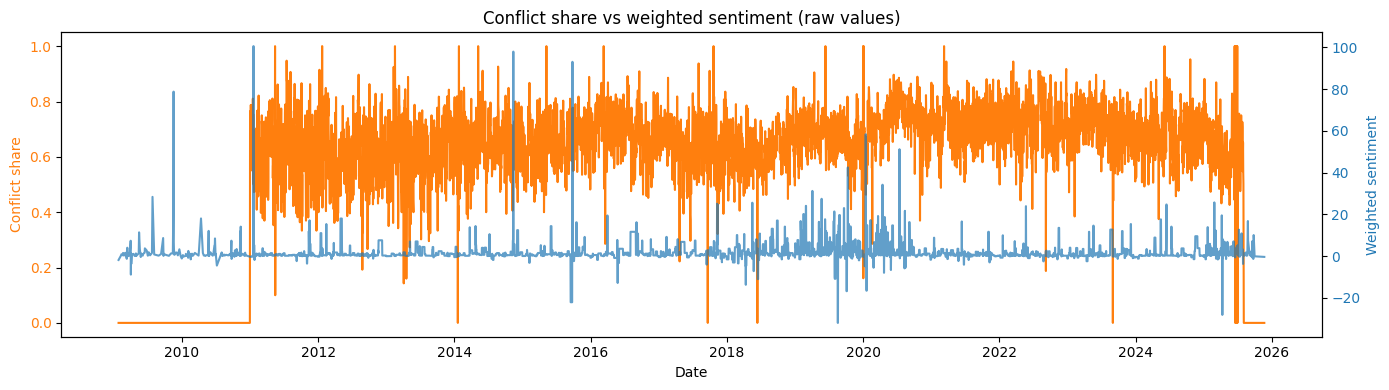

In [ ]:
# plot raw values
fig, ax1 = plt.subplots(figsize=(14, 4))

# left y axis：conflict share
ax1.plot(daily.index, daily["event_conflict_share"],
         label="Conflict share", color="tab:orange")
ax1.set_xlabel("Date")
ax1.set_ylabel("Conflict share", color="tab:orange")
ax1.tick_params(axis="y", labelcolor="tab:orange")

# right y axis: weighted sentiment
ax2 = ax1.twinx()
ax2.plot(daily.index, daily["sentiment_weighted"],
         label="Weighted sentiment", color="tab:blue", alpha=0.7)
ax2.set_ylabel("Weighted sentiment", color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

plt.title("Conflict share vs weighted sentiment (raw values)")
fig.tight_layout()
plt.show()


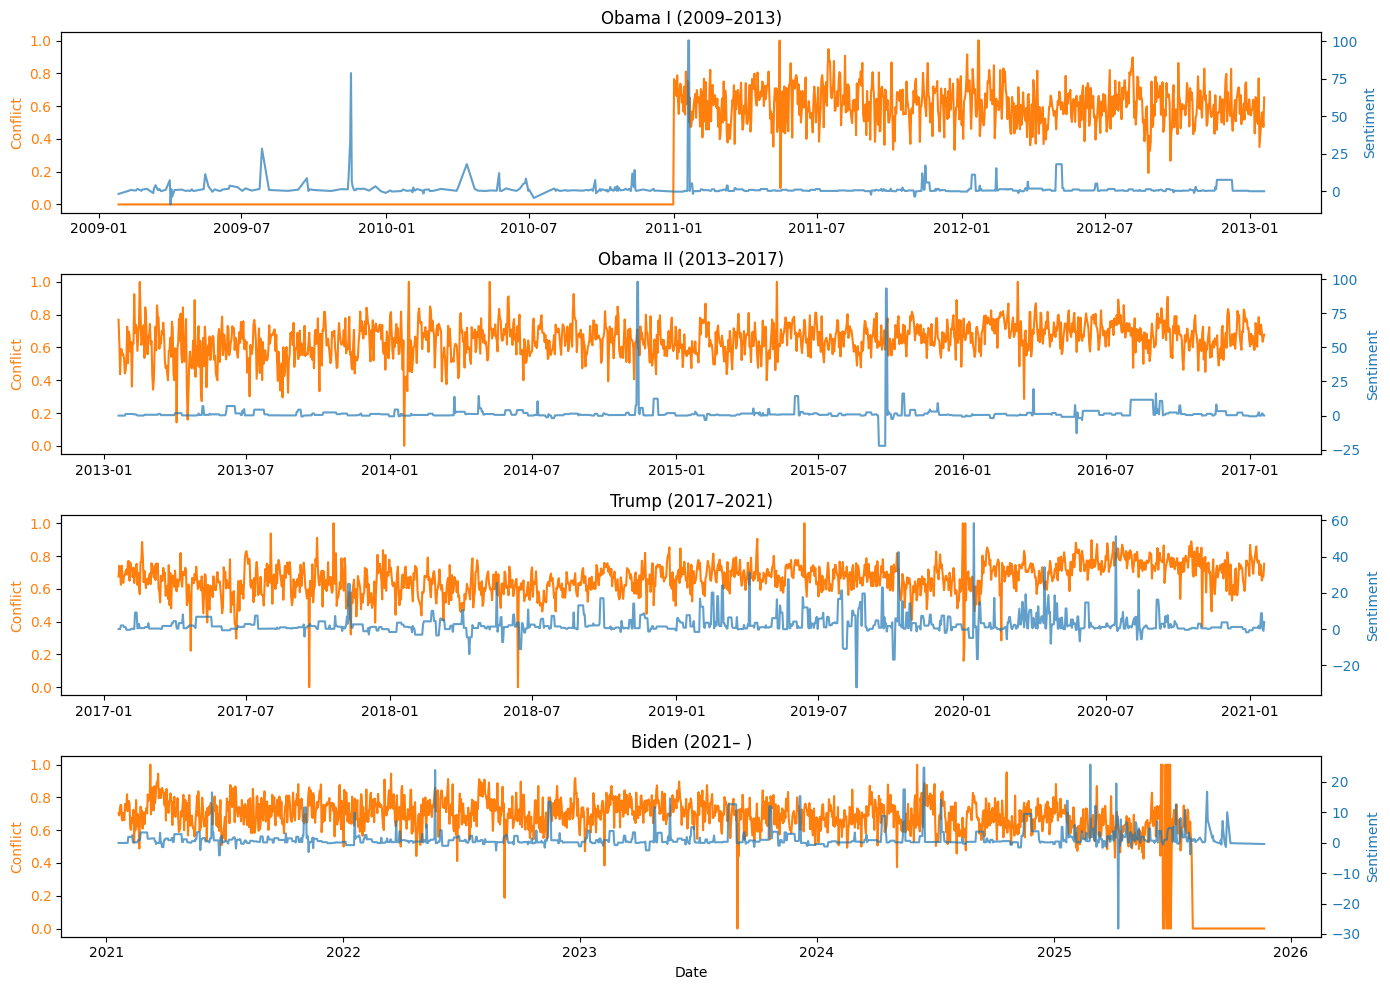

In [ ]:

periods = [
    ("Obama I (2009–2013)",  "2009-01-20", "2013-01-19"),
    ("Obama II (2013–2017)", "2013-01-20", "2017-01-19"),
    ("Trump (2017–2021)",    "2017-01-20", "2021-01-19"),
    ("Biden (2021– )",       "2021-01-20", daily.index.max().strftime("%Y-%m-%d")),
]

fig, axes = plt.subplots(len(periods), 1, figsize=(14, 10), sharex=False)

for ax, (label, start_str, end_str) in zip(axes, periods):
    start = pd.to_datetime(start_str)
    end   = pd.to_datetime(end_str)
    mask = (daily.index >= start) & (daily.index <= end)
    tmp = daily.loc[mask]

    ax2 = ax.twinx()

    ax.plot(tmp.index, tmp["event_conflict_share"],
            label="Conflict share", color="tab:orange")
    ax.set_ylabel("Conflict", color="tab:orange")
    ax.tick_params(axis="y", labelcolor="tab:orange")

    ax2.plot(tmp.index, tmp["sentiment_weighted"],
             label="Weighted sentiment", color="tab:blue", alpha=0.7)
    ax2.set_ylabel("Sentiment", color="tab:blue")
    ax2.tick_params(axis="y", labelcolor="tab:blue")

    ax.set_title(label)

axes[-1].set_xlabel("Date")
plt.tight_layout()
plt.show()


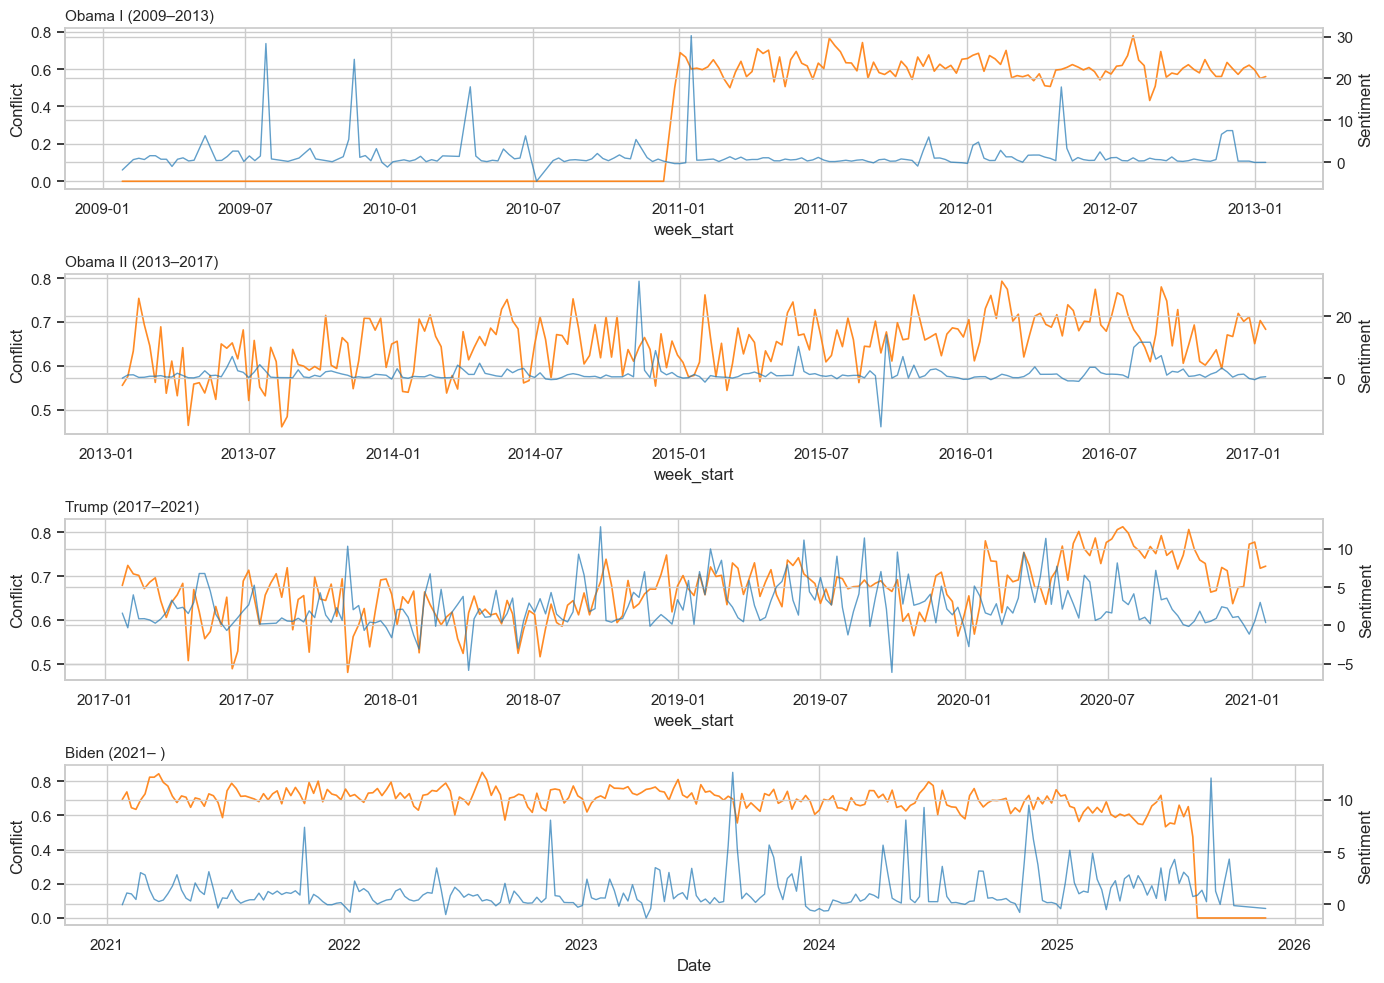

In [19]:
# weekly aggregation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", font_scale=1.0)

# 1. Read and set date index
weekly = pd.read_csv("weekly.csv", parse_dates=["week_start"])
weekly = weekly.sort_values("week_start").set_index("week_start").copy()

# Optional: keep a column version of the date if you like
weekly["week_start"] = weekly.index

# 2. Define periods (using index max which is now a Timestamp)
periods = [
    ("Obama I (2009–2013)",  "2009-01-20", "2013-01-19"),
    ("Obama II (2013–2017)", "2013-01-20", "2017-01-19"),
    ("Trump (2017–2021)",    "2017-01-20", "2021-01-19"),
    ("Biden (2021– )",       "2021-01-20", weekly.index.max().strftime("%Y-%m-%d")),
]

fig, axes = plt.subplots(len(periods), 1, figsize=(14, 10), sharex=False)

for ax, (label, start_str, end_str) in zip(axes, periods):
    start = pd.to_datetime(start_str)
    end   = pd.to_datetime(end_str)

    # 3. Slice by date index
    tmp = weekly.loc[start:end]

    # Create second y-axis
    ax2 = ax.twinx()

    # Conflict (left axis)
    sns.lineplot(
        data=tmp,
        x=tmp.index, y="event_conflict_share",
        ax=ax,
        color="tab:orange",
        linewidth=1.2,
        alpha=0.9,
    )
    ax.set_ylabel("Conflict")
    ax.tick_params(axis="y")

    # Sentiment (right axis)
    sns.lineplot(
        data=tmp,
        x=tmp.index, y="sentiment_weighted",
        ax=ax2,
        color="tab:blue",
        linewidth=1.0,
        alpha=0.7,
    )
    ax2.set_ylabel("Sentiment")
    ax2.tick_params(axis="y")

    # Cosmetics
    ax.set_title(label, loc="left", fontsize=11, pad=6)
    ax.margins(x=0)
    sns.despine(ax=ax, right=False)

axes[-1].set_xlabel("Date")
plt.tight_layout()
plt.show()


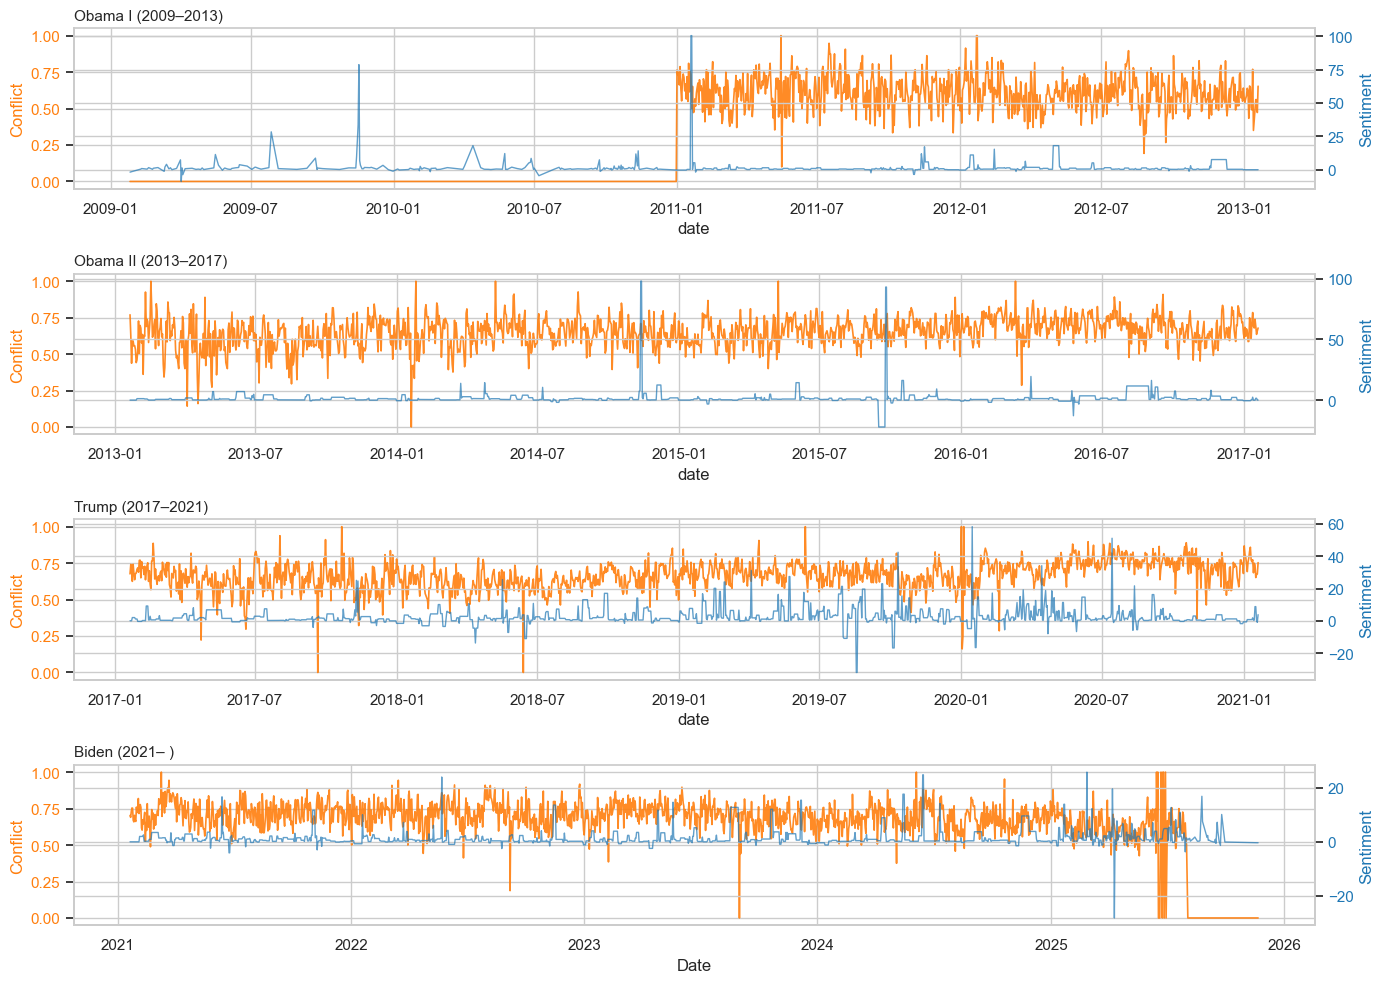

In [ ]:
# The graph is too raw and crowded, try seanborn
import seaborn as sns

sns.set_theme(style="whitegrid", font_scale=1.0)

daily = daily.sort_index().copy()
daily["date"] = daily.index

periods = [
    ("Obama I (2009–2013)",  "2009-01-20", "2013-01-19"),
    ("Obama II (2013–2017)", "2013-01-20", "2017-01-19"),
    ("Trump (2017–2021)",    "2017-01-20", "2021-01-19"),
    ("Biden (2021– )",       "2021-01-20", daily.index.max().strftime("%Y-%m-%d")),
]

fig, axes = plt.subplots(len(periods), 1, figsize=(14, 10), sharex=False)

for ax, (label, start_str, end_str) in zip(axes, periods):
    start = pd.to_datetime(start_str)
    end   = pd.to_datetime(end_str)
    mask = (daily.index >= start) & (daily.index <= end)
    tmp = daily.loc[mask]

    ax2 = ax.twinx()

    # conflict event
    sns.lineplot(
        data=tmp,
        x="date", y="event_conflict_share",
        ax=ax,
        color="tab:orange",
        linewidth=1.2,
        alpha=0.9,
    )
    ax.set_ylabel("Conflict", color="tab:orange")
    ax.tick_params(axis="y", labelcolor="tab:orange")

    # sentiment 
    sns.lineplot(
        data=tmp,
        x="date", y="sentiment_weighted",
        ax=ax2,
        color="tab:blue",
        linewidth=1.0,
        alpha=0.7,
    )
    ax2.set_ylabel("Sentiment", color="tab:blue")
    ax2.tick_params(axis="y", labelcolor="tab:blue")

  
    ax.set_title(label, loc="left", fontsize=11, pad=6)
    ax.margins(x=0)  
    sns.despine(ax=ax, right=False)   

axes[-1].set_xlabel("Date")

plt.tight_layout()
plt.show()


## 2. VAR

In [3]:
import pandas as pd
import numpy as np

In [1]:
from statsmodels.tsa.api import VAR

In [4]:
df_var = pd.read_csv("weekly.csv")

In [6]:
# VAR don't accept any kind of object dtype especially date
# prepare var_df

df_var = df_var[["event_conflict_share", "sentiment_weighted"]].astype(float)

In [7]:
model = VAR(df_var)
lag_results = model.select_order(maxlags=30)
print(lag_results.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -1.136      -1.125      0.3210      -1.132
1       -3.289      -3.255     0.03729      -3.276
2       -3.360     -3.302*     0.03475      -3.338
3       -3.370      -3.290     0.03440     -3.339*
4      -3.378*      -3.276    0.03410*      -3.339
5       -3.372      -3.247     0.03431      -3.324
6       -3.367      -3.218     0.03449      -3.310
7       -3.361      -3.190     0.03469      -3.295
8       -3.358      -3.163     0.03482      -3.283
9       -3.350      -3.133     0.03509      -3.267
10      -3.350      -3.110     0.03507      -3.258
11      -3.344      -3.081     0.03531      -3.243
12      -3.345      -3.060     0.03525      -3.236
13      -3.337      -3.028     0.03555      -3.219
14      -3.339      -3.008     0.03546      -3.212
15      -3.331      -2.977     0.03574      -3.196
16      -3.323      -2.946     

In [8]:
# choose lag = 7
p = 7
var_model = model.fit(p)
print(var_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 08, Dec, 2025
Time:                     17:28:05
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -3.14369
Nobs:                     848.000    HQIC:                  -3.24720
Log likelihood:          -972.451    FPE:                  0.0364623
AIC:                     -3.31148    Det(Omega_mle):       0.0352058
--------------------------------------------------------------------
Results for equation event_conflict_share
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                           0.015961         0.007053            2.263           0.024
L1.event_conflict_share         0.633501         0.034580           18.320           0.000
L1.se

In [9]:
# granger causality tests
print(var_model.test_causality("event_conflict_share", ["sentiment_weighted"]).summary())
print(var_model.test_causality("sentiment_weighted", ["event_conflict_share"]).summary())


Granger causality F-test. H_0: sentiment_weighted does not Granger-cause event_conflict_share. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
        0.6649          2.015   0.702 (7, 1666)
-----------------------------------------------
Granger causality F-test. H_0: event_conflict_share does not Granger-cause sentiment_weighted. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
        0.5062          2.015   0.830 (7, 1666)
-----------------------------------------------


### IRF
The impulse response functions (IRFs) illustrate how shocks to one variable propagate through the system over time.

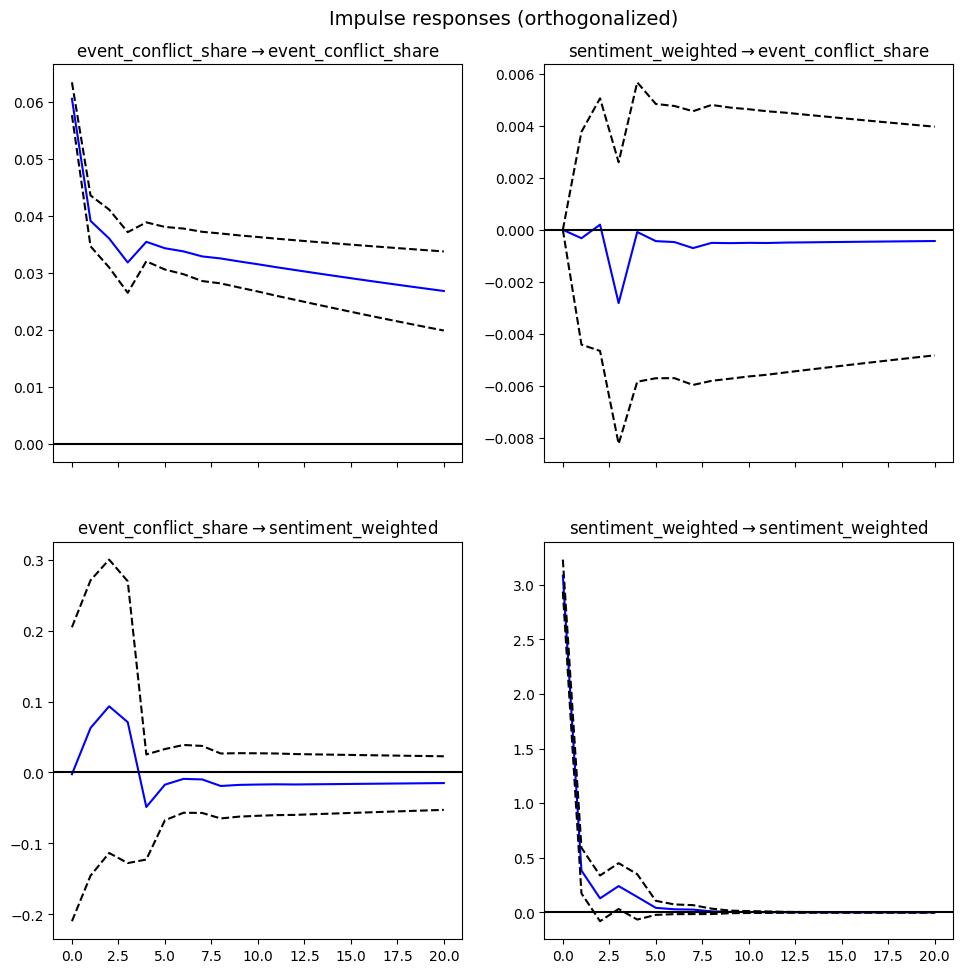

In [ ]:

from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

model = VAR(df_var[["event_conflict_share", "sentiment_weighted"]])
results = model.fit(maxlags=4)

# --- IRF ---
irf = results.irf(20) 

fig = irf.plot(orth=True)
plt.show()


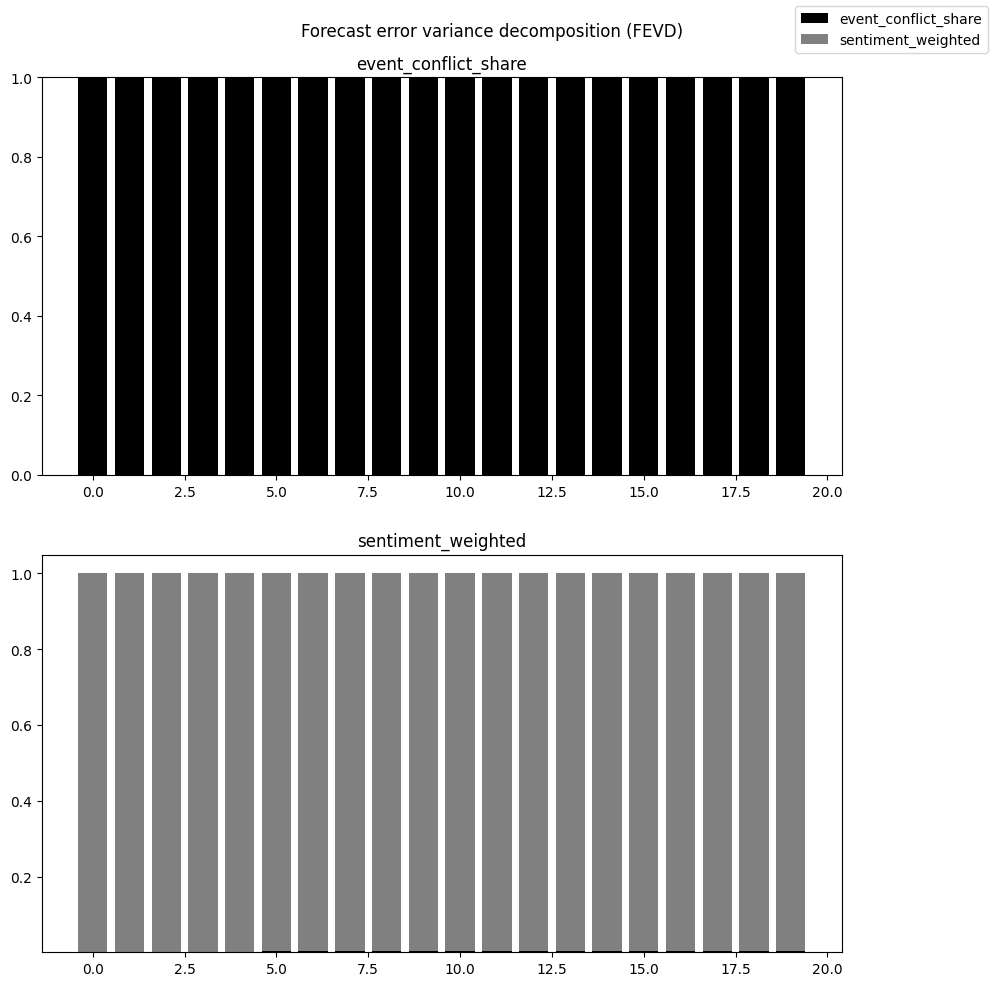

In [14]:
fevd = results.fevd(20)
fevd.plot()
plt.show()

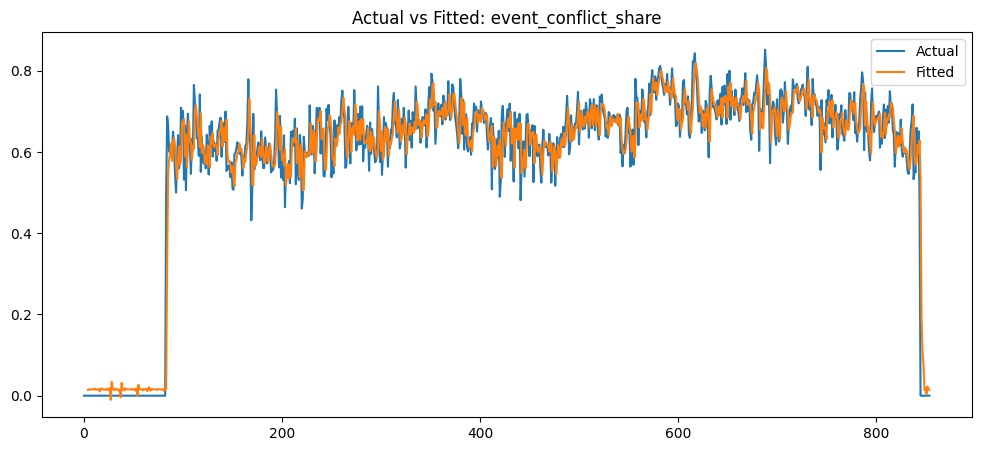

In [13]:
fitted = results.fittedvalues

plt.figure(figsize=(12,5))
plt.plot(df_var["event_conflict_share"], label="Actual")
plt.plot(fitted["event_conflict_share"], label="Fitted")
plt.legend()
plt.title("Actual vs Fitted: event_conflict_share")
plt.show()